<a href="https://colab.research.google.com/github/kanchandhole/Data-Scientist/blob/main/25_feb_pandas_adv_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

course_name = ['Data Science', 'Machine Learning', 'Big Data', 'Data Engineer']
duration = [2, 3, 6, 4]

df = pd.DataFrame({
    'course_name': course_name,
    'duration': duration
})

**Q1.** Write a code to print the data present in the second row of the dataframe, df.

In [2]:
df.iloc[1] #Uses iloc because indexing starts from 0

,1
course_name,Machine Learning
duration,3


**Q2.** What is the difference between the functions loc and iloc in pandas.DataFrame?

**ans:**

| loc                  | iloc                   |
| -------------------- | ---------------------- |
| Label-based indexing | Integer-based indexing |
| Includes last index  | Excludes last index    |
| Can use column names | Uses only numbers      |


**Q3.** Reindex the given dataframe using a variable, reindex = [3,0,1,2] and store it in the variable, new_df
then find the output for both new_df.loc[2] and new_df.iloc[2].

**ans:**
* loc[2] → fetches row with label 2

* iloc[2] → fetches 3rd row position

* Output may differ depending on index order.

In [3]:
reindex = [3, 0, 1, 2]
new_df = df.reindex(reindex)

new_df.loc[2]
new_df.iloc[2]

,1
course_name,Machine Learning
duration,3


Did you observe any difference in both the outputs? If so then explain it.
Consider the below code to answer further questions:
import pandas as pd
import numpy as np
columns = ['column_1', 'column_2', 'column_3', 'column_4', 'column_5', 'column_6']
indices = [1,2,3,4,5,6]
#Creating a dataframe:
df1 = pd.DataFrame(np.random.rand(6,6), columns = columns, index = indices)

In [4]:
import numpy as np

columns = ['column_1','column_2','column_3','column_4','column_5','column_6']
indices = [1,2,3,4,5,6]

df1 = pd.DataFrame(np.random.rand(6,6), columns=columns, index=indices)

**Q4.** Write a code to find the following statistical measurements for the above dataframe df1:
(i) mean of each and every column present in the dataframe.
(ii) standard deviation of column, ‘column_2’

In [5]:
df1.mean() #Mean of each column


,0
column_1,0.348035
column_2,0.362069
column_3,0.723562
column_4,0.658872
column_5,0.594538
column_6,0.555051


In [6]:
df1['column_2'].std() #Standard deviation of column_2

0.3268250469784212

**Q5.** Replace the data present in the second row of column, ‘column_2’ by a string variable then find the
mean of column, column_2.
If you are getting errors in executing it then explain why.
[Hint: To replace the data use df1.loc[] and equate this to string data of your choice.]

**Ans:**

Error Explaination:


* Mean cannot be calculated on mixed data types

* Column becomes object type

* Numerical operations fail

In [7]:
df1.loc[2, 'column_2'] = "Python"
df1['column_2'].mean()

/tmp/ipython-input-2223999652.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Python' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df1.loc[2, 'column_2'] = "Python"


TypeError: unsupported operand type(s) for +: 'float' and 'str'

**Q6.** What do you understand about the windows function in pandas and list the types of windows
functions?

**ans:**

Window functions perform calculations over a sliding window of data.

Types:

Rolling – fixed window

Expanding – growing window

Exponential (EWM) – weighted window

Example:

In [8]:
df1['column_1'].rolling(window=3).mean()

,column_1
1,NaN
2,NaN
3,0.297232
4,0.298177
5,0.409719
6,0.398838


**Q7.** Write a code to print only the current month and year at the time of answering this question.
[Hint: Use pandas.datetime function]

In [9]:
pd.to_datetime("today").strftime("%B %Y")

'January 2026'

**Q8.** Write a Python program that takes in two dates as input (in the format YYYY-MM-DD) and
calculates the difference between them in days, hours, and minutes using Pandas time delta. The
program should prompt the user to enter the dates and display the result.

**Ans:**
Observation

days → whole days only

total_seconds() → precise duration

In [10]:
import pandas as pd

date1 = input("Enter first date (YYYY-MM-DD): ")
date2 = input("Enter second date (YYYY-MM-DD): ")

d1 = pd.to_datetime(date1)
d2 = pd.to_datetime(date2)

diff = d2 - d1

print("Days:", diff.days)
print("Hours:", diff.total_seconds() / 3600)
print("Minutes:", diff.total_seconds() / 60)

Enter first date (YYYY-MM-DD): 2026-01-19
Enter second date (YYYY-MM-DD): 2026-01-2
Days: -17
Hours: -408.0
Minutes: -24480.0


**Q9.** Write a Python program that reads a CSV file containing categorical data and converts a specified
column to a categorical data type. The program should prompt the user to enter the file path, column
name, and category order, and then display the sorted data.

In [13]:
from google.colab import files

In [22]:
upload = files.upload()

Saving crypto_liquidity_raw.csv to crypto_liquidity_raw.csv


In [25]:
import pandas as pd

file_path = input("Enter CSV file path: ")
column = input("Enter column name: ")

df = pd.read_csv(file_path)

df[column] = pd.Categorical(df[column], categories=order, ordered=True)

print(df.sort_values(by=column))

Enter CSV file path: crypto_liquidity_raw.csv
Enter column name: symbol
                  coin symbol         price     1h    24h     7d  \
0              Bitcoin    BTC  40859.460000  0.022  0.030  0.055   
500            Bitcoin    BTC  40851.380000  0.001  0.000 -0.027   
1             Ethereum    ETH   2744.410000  0.024  0.034  0.065   
501           Ethereum    ETH   2824.420000  0.004  0.029  0.034   
2               Tether   USDT      1.000000 -0.001 -0.001  0.000   
..                 ...    ...           ...    ...    ...    ...   
995            IRISnet    NaN      0.055426  0.016 -0.003 -0.088   
996  Circuits of Value    NaN      0.037961  0.002 -0.012 -0.054   
997         ARPA Chain    NaN      0.069003  0.000  0.008 -0.037   
998          SuperRare    NaN      0.464613 -0.003  0.014  0.019   
999         Verus Coin    NaN      0.999387  0.053  0.061 -0.122   

       24h_volume       mkt_cap        date  
0    3.539076e+10  7.709910e+11  16-03-2022  
500  2.047612e+10  

**Q10.** Write a Python program that reads a CSV file containing sales data for different products and
visualizes the data using a stacked bar chart to show the sales of each product category over time. The
program should prompt the user to enter the file path and display the chart.

Enter CSV file path: crypto_liquidity_raw.csv


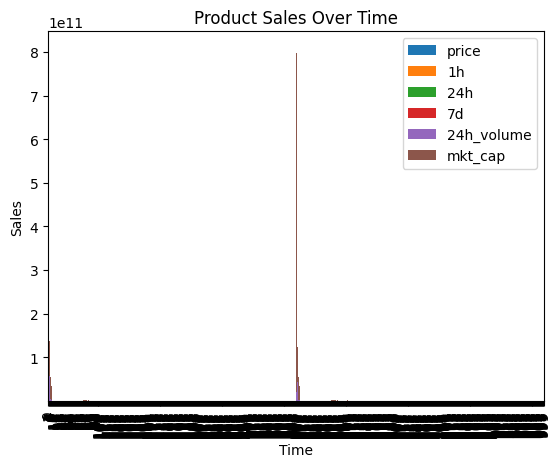

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = input("Enter CSV file path: ")
df = pd.read_csv(file_path)

df.plot(kind='bar', stacked=True)
plt.xlabel("Time")
plt.ylabel("Sales")
plt.title("Product Sales Over Time")
plt.show()

Q11. You are given a CSV file containing student data that includes the student ID and their test score. Write
a Python program that reads the CSV file, calculates the mean, median, and mode of the test scores, and
displays the results in a table.
The program should do the followingM
I Prompt the user to enter the file path of the CSV file containing the student dataR
I Read the CSV file into a Pandas DataFrameR
I Calculate the mean, median, and mode of the test scores using Pandas toolsR
I Display the mean, median, and mode in a table.
Assume the CSV file contains the following columnsM
I Student ID: The ID of the studentR
I Test Score: The score of the student's test.
Example usage of the program:
Enter the file path of the CSV file containing the student data: student_data.csv
+-----------+--------+
| Statistic | Value |
+-----------+--------+
| Mean | 79.6 |
| Median | 82 |
| Mode | 85, 90 |
+-----------+--------+
Assume that the CSV file student_data.csv contains the following data:
Student ID,Test Score
1,85
2,90
3,80
4,75
5,85
6,82
7,78
8,85
9,90
10,85
The program should calculate the mean, median, and mode of the test scores and display the results
in a table.

In [29]:
import pandas as pd

file_path = input("Enter CSV file path: ")
df = pd.read_csv(file_path)

mean = df['price'].mean()
median = df['price'].median()
mode = ", ".join(map(str, df['price'].mode().tolist()))

result = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Mode"],
    "Value": [mean, median, mode]
})

print(result)


Enter CSV file path: crypto_liquidity_raw.csv
  Statistic       Value
0      Mean  656.105988
1    Median       1.095
2      Mode         1.0
